<a href="https://colab.research.google.com/github/dirkh24/MNIST_Classifications/blob/master/MNIST_Fashion_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MNIST Example

In [1]:
import numpy as np
from keras.layers import Dense, Dropout
from keras import Sequential

Using TensorFlow backend.


In [0]:
# Import MNIST fashion example
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [0]:
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)


In [0]:
# preprocessing the input data
X_train = x_train / 255
X_test = x_test / 255

X_train = X_train.reshape(-1,28*28)
X_test = X_test.reshape(-1,28*28)

In [0]:
from keras.utils import to_categorical

In [0]:
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)


In [0]:
# Multilayer Perceptron (MLP) for multi-class softmax classification 
model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(Dense(256, activation='relu', input_shape=(28*28,)))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [11]:
#model.fit(X_train, Y_train,epochs=10,batch_size=128)
model.fit(X_train, Y_train,epochs=10,batch_size=128,validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 4s 92us/step - loss: 0.6195 - acc: 0.7792 - val_loss: 0.4343 - val_acc: 0.8417
Epoch 2/10
48000/48000 [==============================] - 4s 85us/step - loss: 0.4278 - acc: 0.8440 - val_loss: 0.3806 - val_acc: 0.8587
Epoch 3/10
48000/48000 [==============================] - 4s 84us/step - loss: 0.3874 - acc: 0.8584 - val_loss: 0.3865 - val_acc: 0.8642
Epoch 4/10
48000/48000 [==============================] - 4s 83us/step - loss: 0.3606 - acc: 0.8680 - val_loss: 0.3474 - val_acc: 0.8716
Epoch 5/10
48000/48000 [==============================] - 4s 85us/step - loss: 0.3450 - acc: 0.8748 - val_loss: 0.3394 - val_acc: 0.8805
Epoch 6/10
48000/48000 [==============================] - 4s 84us/step - loss: 0.3304 - acc: 0.8793 - val_loss: 0.3295 - val_acc: 0.8810
Epoch 7/10
48000/48000 [==============================] - 4s 83us/step - loss: 0.3212 - acc: 0.8819 - val_loss: 0.3336 - val_acc

In [12]:
score = model.evaluate(X_test, Y_test, batch_size=128)
print(score)

10000/10000 [==============================] - 0s 28us/step
[0.358658270072937, 0.875]


In [0]:
import matplotlib.pyplot as plt
from random import randint

Modelprediction: Trouser


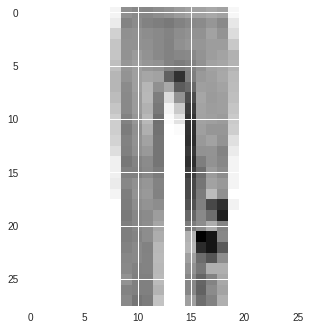

In [26]:
number = randint(0,len(x_test))
labels = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
predictions = model.predict(X_test[number].reshape(1,28*28))
print("Modelprediction: " + labels[predictions.argmax()])
plt.imshow(x_test[number],cmap='gray_r')